In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn import tree

## **Classification**

In [2]:
df = pd.read_csv('admission_predict.csv')

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

df.columns

Index(['serial_no.', 'gre_score', 'toefl_score', 'university_rating', 'sop',
       'lor', 'cgpa', 'research', 'chance_of_admit'],
      dtype='object')

In [7]:
X = df.loc[:, "gre_score":"research"]
y = df['chance_of_admit'] >= .8

In [13]:
X.dtypes

gre_score              int64
toefl_score            int64
university_rating      int64
sop                  float64
lor                  float64
cgpa                 float64
research               int64
dtype: object

In [14]:
# Fitting and Predicting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
dt = DecisionTreeClassifier(max_depth = 2, ccp_alpha = 0.01, criterion = 'gini')
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print(dt.score(X_test, y_test))
print(accuracy_score(y_test, y_pred))

0.95
0.95


|--- cgpa <= 8.85
|   |--- class: False
|--- cgpa >  8.85
|   |--- gre_score <= 318.50
|   |   |--- class: False
|   |--- gre_score >  318.50
|   |   |--- class: True



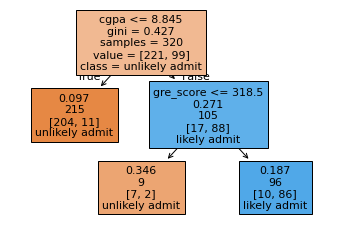

In [17]:
tree.plot_tree(dt, feature_names = X_train.columns,
                max_depth = 3, class_names = ['unlikely admit', 'likely admit'],
                label = 'root', filled = True)

print(tree.export_text(dt, feature_names = X.columns.tolist()))

In [19]:
# Split Criteria
def gini(data):
    data = pd.Series(data)
    return 1 - sum(data.value_counts(normalize = True) ** 2)

gi = gini(y_train)
print(f"Gini Impurity: {gi:.4f}")

Gini Impurity: 0.4273


In [20]:
def info_gain(left, right, current_impurity):
    """Information Gain associated with creating a node/split data.
    Input: left, right are data in left branch, right banch, respectively
    current_impurity is the data impurity before splitting into left, right branches
    """
    w = float(len(left)) / (len(left) + len(right))
    return current_impurity - w * gini(left) - (1 - w) * gini(right)

In [26]:
info_gain_list = []
for i in X_train['cgpa'].unique():
    left = y_train[X_train['cgpa'] <= i]
    right = y_train[X_train['cgpa'] > i]
    info_gain_list.append([i, info_gain(left, right, gi)])

ig_table = pd.DataFrame(info_gain_list, columns = ['split_value', 'info_gain']).sort_values('info_gain', ascending = False)
ig_table.head(10)

,split_value,info_gain
17,8.84,0.273044
110,8.92,0.268909
138,8.85,0.267609
142,8.88,0.265705
107,8.83,0.264461
86,8.90,0.264220
55,8.94,0.263641
6,8.87,0.261259
97,8.89,0.260392
1,8.80,0.260290


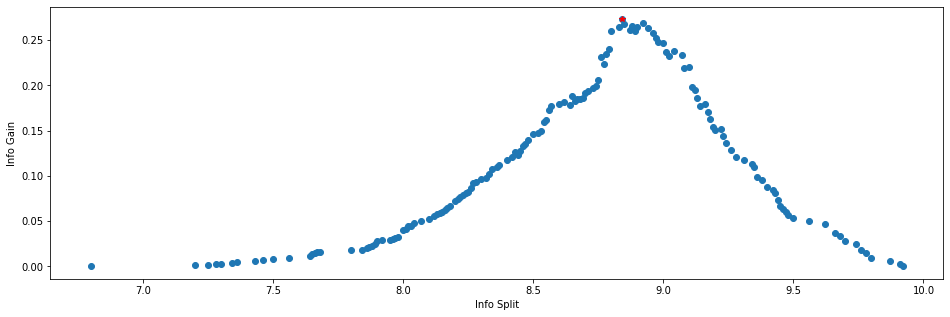

In [31]:
plt.figure(figsize = (16, 5))
plt.plot(ig_table['split_value'], ig_table['info_gain'], 'o')
plt.plot(ig_table['split_value'].iloc[0], ig_table['info_gain'].iloc[0], 'r*')
plt.xlabel('Info Split')
plt.ylabel('Info Gain')
plt.show()

## **Regression**

In [34]:
X = df.loc[:, "gre_score":"research"]
y = df['chance_of_admit']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)
dt = DecisionTreeRegressor(max_depth = 3, ccp_alpha = 0.001)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

# Evaluation metrics
print(f"R2-score: {dt.score(X_test, y_test)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

R2-score: 0.7314865587479549
Mean Squared Error: 0.006933919090469509
Root Mean Squared Error: 0.006933919090469509


[Text(0.5, 0.8333333333333334, 'cgpa <= 8.845\nsquared_error = 0.019\nsamples = 320\nvalue = 0.725'),
 Text(0.25, 0.5, 'cgpa <= 8.11\nsquared_error = 0.011\nsamples = 215\nvalue = 0.658'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.009\nsamples = 69\nvalue = 0.56'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.006\nsamples = 146\nvalue = 0.704'),
 Text(0.75, 0.5, 'cgpa <= 9.225\nsquared_error = 0.006\nsamples = 105\nvalue = 0.863'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.005\nsamples = 61\nvalue = 0.814'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.001\nsamples = 44\nvalue = 0.931')]

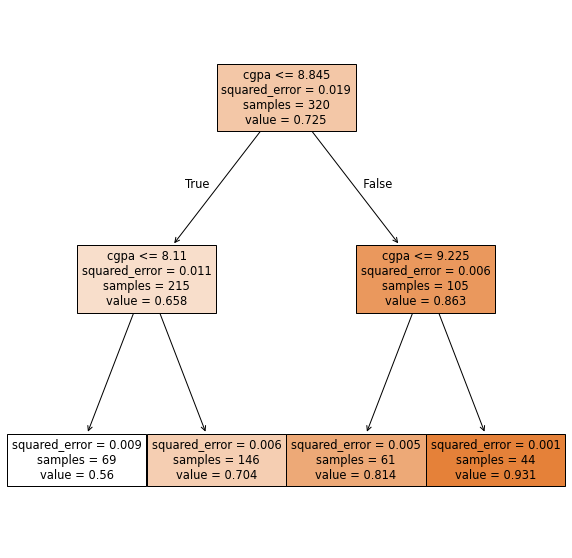

In [42]:
plt.figure(figsize = (10, 10))
tree.plot_tree(dt, feature_names = X_train.columns,
               max_depth = 2, filled = True)

In [45]:
def mse_data(data):
    data = pd.Series(data)
    return np.mean((data - np.mean(data)) ** 2)

def mse_gain(left, right, current_mse):
    w = float(len(left)) / (len(left) + len(right))
    return current_mse - w * mse_data(left) - (1 - w) * mse_data(right)

m = mse_data(y_train)
print(f'MSE at root: {m:.4f}')

mse_gain_list = []
for i in X_train['cgpa'].unique():
    left = y_train[X_train['cgpa'] <= i]
    right = y_train[X_train['cgpa'] > i]
    mse_gain_list.append([i, mse_gain(left, right, m)])

mse_table = pd.DataFrame(mse_gain_list, columns = ['split_value', 'info_gain']).sort_values('info_gain', ascending = False)

mse_table.head(10)

MSE at root: 0.0189


,split_value,info_gain
17,8.84,0.009269
92,8.62,0.009252
1,8.80,0.009246
126,8.73,0.009236
107,8.83,0.009231
129,8.60,0.009223
110,8.92,0.009220
119,8.74,0.009213
5,8.50,0.009201
21,8.70,0.009198


Text(0, 0.5, 'info gain')

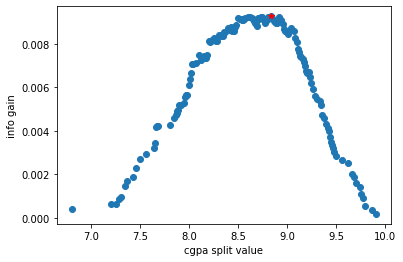

In [52]:
plt.figsize = (16, 10)

plt.plot(mse_table['split_value'], mse_table['info_gain'],'o')
plt.plot(mse_table['split_value'].iloc[0], mse_table['info_gain'].iloc[0],'r*')
plt.xlabel('cgpa split value')
plt.ylabel('info gain')

In [50]:
result_df = pd.DataFrame(X_test, columns = X_train.columns)
result_df['Actual'] = y_test.values
result_df['Predict'] = y_pred

result_df.head(10)

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,Actual,Predict
209,301,104,3,3.5,4.0,8.12,1,0.68,0.704110
280,311,102,3,4.5,4.0,8.64,1,0.68,0.704110
33,340,114,5,4.0,4.0,9.60,1,0.90,0.930682
210,325,108,4,4.5,4.0,9.06,1,0.79,0.814262
93,301,97,2,3.0,3.0,7.88,1,0.44,0.560435
84,340,115,5,4.5,4.5,9.45,1,0.94,0.930682
329,297,96,2,2.5,1.5,7.89,0,0.43,0.560435
94,303,99,3,2.0,2.5,7.66,0,0.36,0.560435
266,312,105,2,2.0,2.5,8.45,0,0.72,0.704110
126,323,113,3,4.0,3.0,9.32,1,0.85,0.930682
